<a href="https://colab.research.google.com/github/JagratiTalreja01/Super-Resolution-SRCNN-/blob/main/CNN_Filter_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import MaxPooling2D, Activation, Convolution2D
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

In [ ]:
!git clone https://github.com/niazwazir/TestImage.git

Cloning into 'TestImage'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 93 (delta 8), reused 0 (delta 0), pack-reused 51
Unpacking objects: 100% (93/93), done.


In [ ]:
!ls

sample_data  TestImage


In [ ]:
cd TestImage

/content/TestImage


In [ ]:
!ls

baby8HR.png				   K11.png
baby8LR.png				   K12.png
baby_GT.bmp				   K13.png
Bicubic_Butterfly_x8.png		   K14.png
bird8HR.png				   K1.png
bird8LR.png				   K2.png
bird_GT.bmp				   K3.png
Blurry_Images.zip			   K4.png
Brain.dcm				   K5.png
butterfly8HR.png			   K6.png
butterfly8LR.png			   K7.png
butterfly_GT.bmp			   K8.png
cat.png					   K9.png
Clean_Images.zip			   man.jpg
content.png				   NetworkDepth.png
Deep_CNN_Based_Generated_Butterfly_X8.png  ParametersdBCalculation.png
Fully_Symmetric.png			   Parameters.png
head8HR.png				   prepare_data.py
head8LR.png				   Proposed_Butterflow_X8.png
head_GT.bmp				   PSNR_DB_IMPROVEMENT.png
InceptionA.png				   sky.png
InceptionB.png				   style.png
InceptionC.png				   WAZIR_MODEL_SCALE_8.h5
InceptionD.png				   woman8HR.png
InceptionE.png				   woman8LR.png
K10.png					   woman_GT.bmp


Visualizing the Image

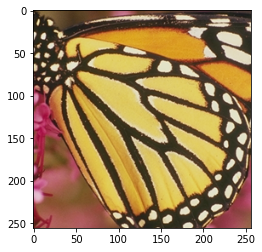

In [ ]:
img1 = cv2.imread("butterfly_GT.bmp")
img=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img)
mpl.rcParams['axes.grid'] = False
plt.show()

In [ ]:
# what does the image look like?
img.shape

(256, 256, 3)

Lets create a model with 1 Convolutional layer

In [11]:
# here we get rid of that added dimension and plot the image
def visualize_img(model, img):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    img_batch = np.expand_dims(img,axis=0)
    conv_img = model.predict(img_batch)
    conv_img = np.squeeze(conv_img, axis=0)
    print(conv_img.shape)
    plt.imshow(conv_img)

10x10 Kernel ConvCat
Cat with 1 filter

In [13]:
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_img_printer(model, img):
    '''prints the cat as a 2d array'''
    img_batch = np.expand_dims(img,axis=0)
    conv_img2 = model.predict(img_batch)

    conv_img2 = np.squeeze(conv_img2, axis=0)
    print(conv_img2.shape)
    conv_img2 = conv_img2.reshape(conv_img2.shape[:2])

    print(conv_img2.shape)
    plt.imshow(conv_img2)

(85, 85, 1)
(85, 85)


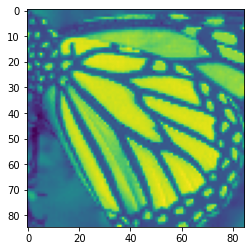

In [14]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_img_printer(model, img)

(17, 17, 1)
(17, 17)


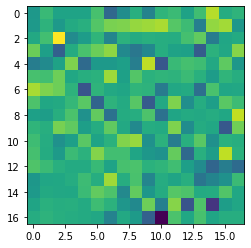

In [17]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        15,    # y dimension of kernel (we're going for a 3x3 kernel)
                        15,    # x dimension of kernel
                        input_shape=img.shape))

nice_img_printer(model, img)

Lets add a relu activation

(85, 85, 1)
(85, 85)


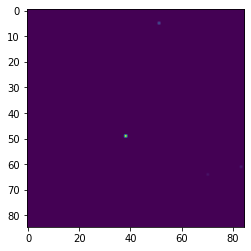

In [18]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_img_printer(model, img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(85, 85, 3)


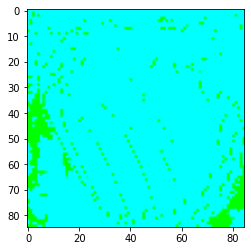

In [20]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

visualize_img(model, img)

Max Pooling

(17, 17, 1)
(17, 17)


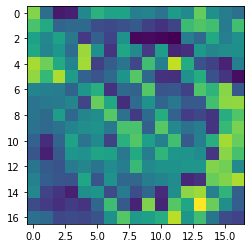

In [21]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

nice_img_printer(model, img)

Activation then pooling

(17, 17, 1)
(17, 17)


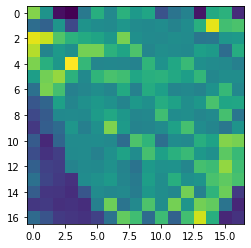

In [22]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_img_printer(model, img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(17, 17, 3)


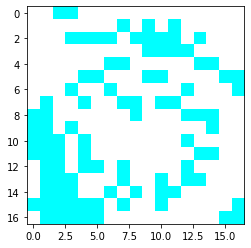

In [23]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_img(model, img)

Cat after the convolutional and pooling stages of LeNet

(3, 3, 1)
(3, 3)


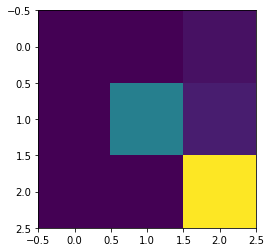

In [24]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

nice_img_printer(model, img)

(4, 4, 1)
(4, 4)


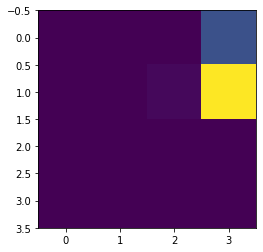

In [25]:
# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_img_printer(model, img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 4, 3)


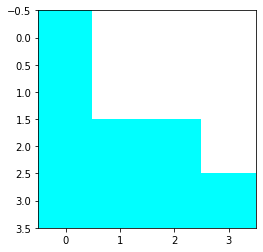

In [26]:
# 3 filters in both conv layers
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_img(model, img)